In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import scipy.misc as sc

%matplotlib inline
rc('figure', figsize=(11.0, 9.0)) # easy way to re-size a figure
rc('animation', html='html5')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.


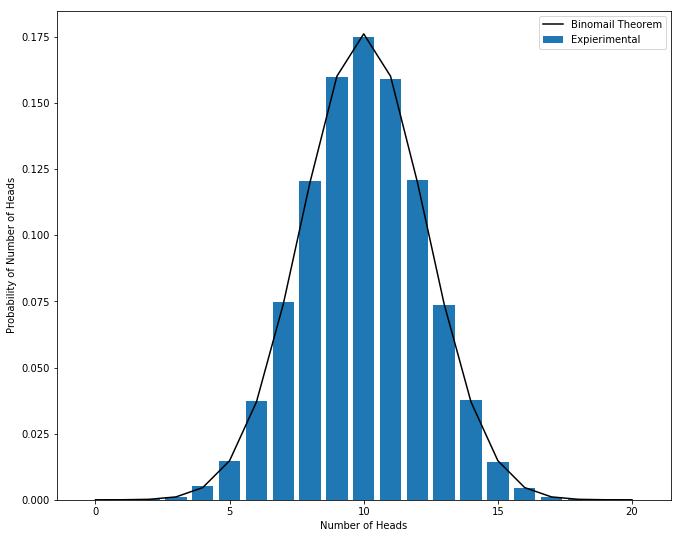

In [8]:
N = 20 #number of coins being flipped
k = 1000 #number of trials
def PNxk(N,k) :  #my function to find probabilities  
    counts = np.zeros(N+1)
    for i in range(0,k):
        draw = np.random.randint(2, size=N)
        num_heads = len(draw[np.where(draw == 1)])
        num_tails = len(draw[np.where(draw == 0)])
        counts[num_heads] = counts[num_heads] + 1
    return counts / k 
#print(PNxk(20,1000))
plt.bar(np.arange(N+1), PNxk(20,100000), label='Expierimental')

def PNx(N): #Binomial Theorem Probability 
    p = 0.5
    x = (np.arange(N+1))
    PNx = sc.factorial(N)/((sc.factorial(x)*sc.factorial(N-x)))*((0.5)**N)
    return PNx
plt.plot(np.arange(N+1), PNx(N), 'k', label='Binomail Theorem')     
plt.xlabel('Number of Heads')
plt.ylabel('Probability of Number of Heads')
plt.legend()


In [9]:
p = 0.5 #standard probability 
Expec_val_20 = np.sum(PNxk(20,100000)*np.arange(20+1))
print(Expec_val_20)
Expec_val_40 = np.sum(PNxk(40,100000)*np.arange(40+1))
print(Expec_val_40)

9.998800000000001
19.968739999999997


In [10]:
N = 100 #number of coins being flipped
k = 10000 #number of trials
p = 0.05



def PNxk1(N,k,p) :  #my function to find probabilities  
    counts = np.zeros(N+1)
    for i in range(0,k):
        #draw = np.random.randint(100, size=N)
        draw = np.random.random(size=N)
        num_heads = len(draw[np.where(draw <= p)])
        num_tails = len(draw[np.where(draw > p)])
        counts[num_heads] = counts[num_heads] + 1
    return counts / k 

plt.bar(np.arange(N+1), PNxk1(N,k,p), label='Expierimental')

def PNx(N,p): #Binomial Theorem Probability 
    x = (np.arange(N+1))
    PNx = sc.factorial(N)/((sc.factorial(x)*sc.factorial(N-x)))*((p)**x)*((1-p)**(N-x))
    return PNx

plt.plot(np.arange(N+1), PNx(N,p), '-r', label='Binomial Theorem')

def Pos(N,p):
    x = np.arange(N+1)
    Pos = ((N*p)**x)*np.exp(-N*p)/sc.factorial(x)
    return Pos

plt.plot(np.arange(N+1), Pos(N,p), '-k', label='Possion Distribution')
plt.ylabel('Probability of Number of Heads')
plt.xlabel('Number of Heads')
plt.legend()

exp_val_x = np.sum(PNxk1(N,k,p)*np.arange(N+1))
exp_val_x_sqr = np.sum(PNxk1(N,k,p)*(np.arange(N+1))**2)
var_x = exp_val_x_sqr - (exp_val_x)**2

print(exp_val_x)
print(var_x)

    
    


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.


5.017799999999999
4.700383160000005


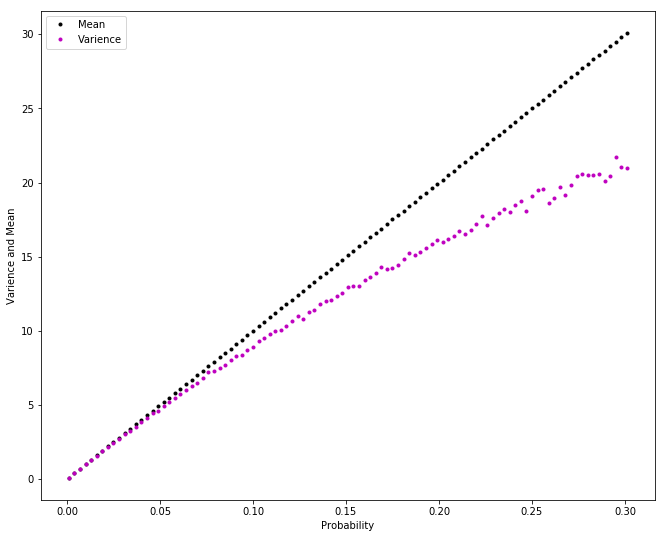

In [81]:
#trying to graph Var(x) and mean(x) vs p 
# x-axis -> probability from .001 to .1 
N = 100
k = 1000000
prob = np.linspace(.001, .301, N+1, endpoint=True)
def sum_of_counts_x(N,k):
    sum = np.zeros(N+1)
    for i,p in enumerate(prob):
        #p = (i+1)/(N*10)
        sum[i] = np.sum(PNxk1(N,k,p)*np.arange(N+1))
        i += 1
    return sum

def sum_of_counts_x_sqr(N,k):
    sum = np.zeros(N+1)
    for i,p in enumerate(prob):
        #p = (i+1)/(N*10)
        sum[i] = np.sum(PNxk1(N,k,p)*(np.arange(N+1))**2)
        i += 1
    return sum

exp_val_x = sum_of_counts_x(N,k)
exp_val_x_sqr = sum_of_counts_x_sqr(N,k)
Var_x = np.array(exp_val_x_sqr - (exp_val_x)**2)

#print(len(exp_val_x))
#print(len(exp_val_x_sqr))
#print(prob)
plt.plot(prob, exp_val_x, 'k.', label='Mean')
plt.plot(prob, Var_x, 'm.', label='Varience')
plt.xlabel('Probability')
plt.ylabel('Varience and Mean')
plt.legend()
